## General information about this notebook

This notebook series has been initiated by the Data Management Project (INF) within the TR-172 ["ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³](http://www.ac3-tr.de/) funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Author(s) of this notebook: 
 - *Matthias Buschmann*, [*IUP Bremen*](https://www.iup.uni-bremen.de), *Otto-Hahn-Allee 1, D-28359 Bremen*, *m_buschmann@iup.physik.uni-bremen.de*

Github repository: https://github.com/ac3-tr/ac3-notebooks

This notebook is licensed under the [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/ "CC-BY-4.0")

# Dataset description

**Title:**     
TCCON data from Ny-Ålesund, Svalbard (NO), Release GGG2020.R0

**Authors**    
Buschmann, M.; Petri, C.; Palm, M.; Warneke, T.; Notholt, J.

**Description**
The Total Carbon Column Observing Network (TCCON) is a network of ground-based Fourier Transform Spectrometers that record direct solar absorption spectra of the atmosphere in the near-infrared. From these spectra, accurate and precise column-averaged abundances of atmospheric constituents including CO2, CH4, N2O, HF, CO, H2O, and HDO, are retrieved. This is the GGG2020 data release of observations from the TCCON station at Ny-Ålesund, Svalbard, Norway

**Year**
2022

**Institutes**  
Institute of Environmental Physics, University Bremen

**DOI**
[10.14291/tccon.ggg2020.nyalesund01.R0](https://doi.org/10.14291/tccon.ggg2020.nyalesund01.R0)

**License**    [TCCON Data License](https://doi.org/10.14291/tccon.ggg2020.nyalesund01.R0)

**Funding information** 

## Contents of this notebook




## Import relevant modules

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import datetime as dt

## Pre-processing of the imported data

After downloading the NetCDF data set from the webapage behind the DOI, we save the file 'ny20050316_20210919.public.qc.nc' locally. It can be read almost natively with xarray, the date time format can be decoded by choosing the argument "decode_timedelta=True" in xarray's open_dataset() method.

In [2]:
fname = 'ny20050316_20210919.public.qc.nc'

data = xr.open_dataset(fname, decode_timedelta=True)

# preview data
data

<xarray.Dataset>
Dimensions:                                       (time: 120629,
                                                   prior_altitude: 51,
                                                   ak_altitude: 51)
Coordinates:
  * time                                          (time) datetime64[ns] 2005-...
  * prior_altitude                                (prior_altitude) float32 0....
  * ak_altitude                                   (ak_altitude) float32 0.0 ....
Data variables: (12/93)
    prior_time                                    (time) datetime64[ns] ...
    ak_pressure                                   (ak_altitude) float32 ...
    ak_xco2                                       (time, ak_altitude) float32 ...
    extrapolation_flags_ak_xco2                   (time) int8 ...
    ak_xwco2                                      (time, ak_altitude) float32 ...
    extrapolation_flags_ak_xwco2                  (time) int8 ...
    ...                                            ...
    prior_xn2o                                    (time) float32 ...
    prior_xco                                     (time) float32 ...
    prior_xhf                                     (time) float32 ...
    prior_xh2o                                    (time) float32 ...
    prior_xhdo                                    (time) float32 ...
    prior_xco2_x2019                              (time) float32 ...
Attributes: (12/19)
    source:                      Products retrieved from solar absorption spe...
    description:                 \nCarbon Dioxide Dry Column-Averaged Mixing ...
    file_creation:               Created with Python 3.7.3; the library netCD...
    title:                       Atmospheric trace gas column-average dry-air...
    data_use_policy:             https://tccon-wiki.caltech.edu/Network_Polic...
    auxiliary_data_description:  https://tccon-wiki.caltech.edu/Network_Polic...
    ...                          ...
    data_doi:                    10.14291/tccon.ggg2020.nyalesund01.R0
    data_reference:              M. Buschmann, C. Petri, M. Palm, T. Warneke,...
    data_revision:               R0
    short_location:              Ny-Ålesund, Svalbard, Norway
    file_format_version:         2020.B
    file_format_information:     For a description of the changes between fil...

## Plotting example
### Dry-air mole fractions of the trace gases CO$_2$ and CH$_4$

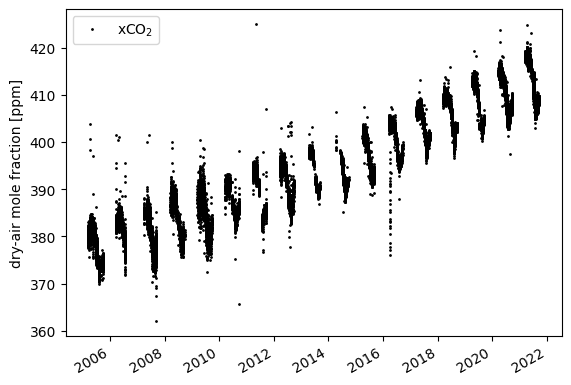

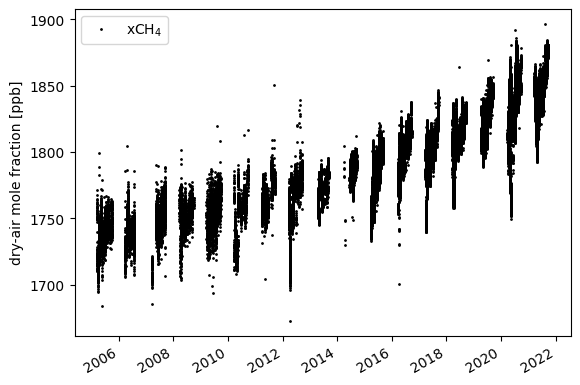

In [3]:
# CO2 figure
fig, ax = plt.subplots(1)
ax.plot(data['time'], data['xco2'], 'k.', markersize=2, label='xCO$_2$')
ax.set_ylabel('dry-air mole fraction [ppm]')
ax.legend()
fig.autofmt_xdate()

# CH4 figure
fig, ax = plt.subplots(1)
ax.plot(data['time'], data['xch4']*1000, 'k.', markersize=2, label='xCH$_4$')
ax.set_ylabel('dry-air mole fraction [ppb]')
ax.legend()
fig.autofmt_xdate()

## Plotting selection based on reported error

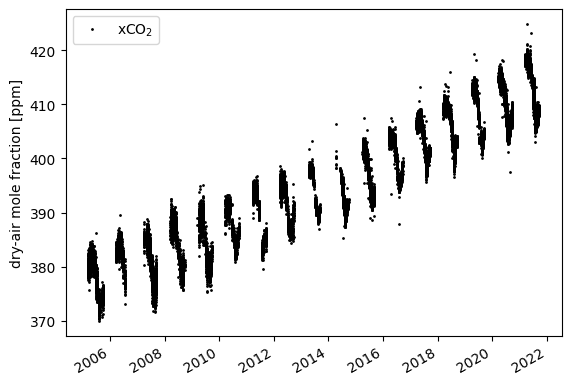

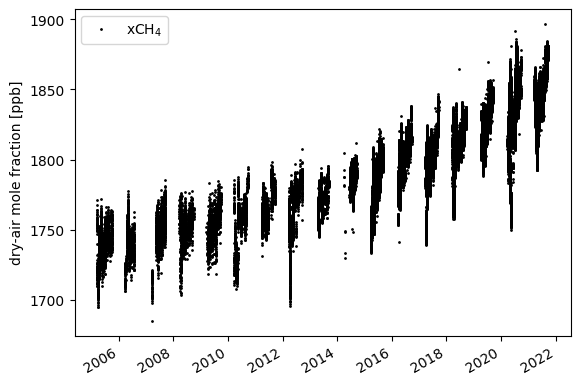

In [4]:
# choose error limits of 2ppm for xCO2 and 10ppb for XCH4. Apply selection if both conditions are met simultaneously.
data_selected = data.where((data['xco2_error']<2) & (data['xch4_error']*1e3<10))

fig, ax = plt.subplots(1)
ax.plot(data_selected['time'], data_selected['xco2'], 'k.', markersize=2, label='xCO$_2$')
ax.set_ylabel('dry-air mole fraction [ppm]')
ax.legend()
fig.autofmt_xdate()

fig, ax = plt.subplots(1)
ax.plot(data_selected['time'], data_selected['xch4']*1000, 'k.', markersize=2, label='xCH$_4$')
ax.set_ylabel('dry-air mole fraction [ppb]')
ax.legend()
fig.autofmt_xdate()


### Plotting selected xCO$_2$ a priori profile

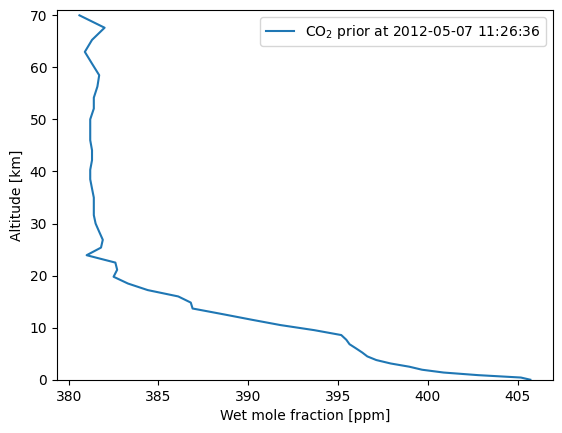

In [5]:
i = 10000 # index of a priori profile to plot

fig, ax = plt.subplots(1)
ax.set_ylim(0,71)
ax.set_xlabel('Wet mole fraction [ppm]')
ax.set_ylabel('Altitude [km]')
ax.plot(data['prior_co2'][i,:], data['prior_altitude'], '-', label='CO$_2$ prior at '+data['time'][i].dt.strftime("%Y-%m-%d %H:%M:%S").item())
ax.legend()


### Plot xCO$_2$ averaging kernel

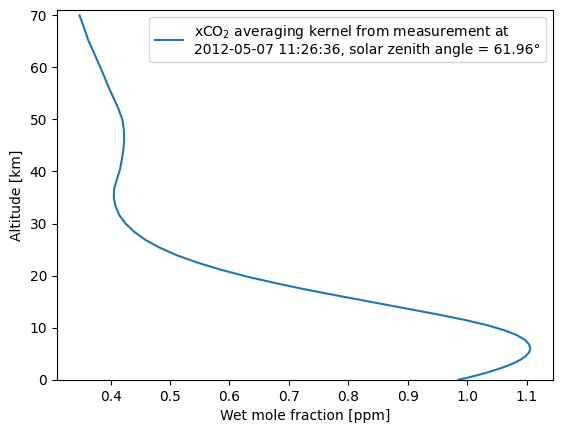

In [6]:
i=10000

lbl = 'xCO$_2$ averaging kernel from measurement at \n'+data['time'][i].dt.strftime("%Y-%m-%d %H:%M:%S").item()+', solar zenith angle = %2.2f°'%(data['solzen'][i].item())

fig, ax = plt.subplots(1)
ax.set_ylim(0,71)
ax.set_xlabel('Wet mole fraction [ppm]')
ax.set_ylabel('Altitude [km]')
ax.plot(data['ak_xco2'][i,:], data['ak_altitude'], label=lbl)
ax.legend()
